# Project 3: Web API's & NLP

## Preprocessing and Modeling

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text 

In [12]:
# Read the data
df = pd.read_csv('../data/reddit_data_clean.csv')

In [13]:
df.head()

,text,subreddit,y
0,How to sync controller after Xbox breaks down?,xboxone,0
1,Curious if using game sharing on the Xbox one ...,xboxone,0
2,Name Change: Untaken Name Unavailable I was tr...,xboxone,0
3,Xbox game pass ultimate 14 day free trial codes,xboxone,0
4,Leaving Gamepass December 15 Leaving December ...,xboxone,0


In [14]:
my_stop_words = ['in', 'of', 'for', 'is', 'on', 'my', 'it', 'and', 'to', 'the', 'me', 'had', 'been' 'from', 'except',
             'found', 'will', 'i', 'nowhere', 'somehow', 'do', 'now', 'so', 'made', 'make', 'next' 'game']

In [15]:
# combined my stop words with the default stop words from sklearn
# Code credit to Adam

stop_words = text.ENGLISH_STOP_WORDS.union(my_stop_words)

In [16]:
X = df['text']
y = df['y']

In [17]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y)

In [18]:
y_train.mean()

0.5

In [19]:
y_train.value_counts(normalize = True)

1    0.5
0    0.5
Name: y, dtype: float64

## Logistic Regression and Count Vectorizer/TfidVecorizer

In [20]:
# Instantiate pipeline.
pipe_cv = Pipeline([
    ('cv', CountVectorizer()),
    ('lr', LogisticRegression(solver = 'liblinear'))
])

# Define grid of parameters to GridSearch over.
params_grid = {
    'cv__max_features': [None, 3000, 5000, 10000],
    'cv__stop_words': [stop_words,'english', None],
    'cv__ngram_range': [(1,1), (1,2)]
}

# GridSearch over pipeline with given grid of parameters.
gs_cv = GridSearchCV(pipe_cv, params_grid, cv=5)

# Fit model.
gs_cv.fit(X_train, y_train)

print(f'GridSearch score with CountVectorized features on training set is {round(gs_cv.score(X_train, y_train), 4)}.')
print()
print(f'GridSearch score with CountVectorized features on testing set is {round(gs_cv.score(X_test, y_test), 4)}.')

GridSearch score with CountVectorized features on training set is 0.9856.

GridSearch score with CountVectorized features on testing set is 0.868.


In [21]:
gs_cv.best_params_

{'cv__max_features': None,
 'cv__ngram_range': (1, 2),
 'cv__stop_words': frozenset({'a',
            'about',
            'above',
            'across',
            'after',
            'afterwards',
            'again',
            'against',
            'all',
            'almost',
            'alone',
            'along',
            'already',
            'also',
            'although',
            'always',
            'am',
            'among',
            'amongst',
            'amoungst',
            'amount',
            'an',
            'and',
            'another',
            'any',
            'anyhow',
            'anyone',
            'anything',
            'anyway',
            'anywhere',
            'are',
            'around',
            'as',
            'at',
            'back',
            'be',
            'became',
            'because',
            'become',
            'becomes',
            'becoming',
            'been',
            'beenfrom',
         

In [22]:
# Instantiate pipeline.
pipe_tf = Pipeline([
    ('tf',TfidfVectorizer()),
    ('lr', LogisticRegression(solver = 'liblinear'))
])

# Define grid of parameters to GridSearch over.
params_grid = {
    'tf__max_features': [None, 3000, 5000, 10000],
    'tf__stop_words': [stop_words, 'english', None],
    'tf__ngram_range': [(1,1), (1,2)]
}

# GridSearch over pipeline with given grid of parameters.
gs_tf = GridSearchCV(pipe_tf, params_grid, cv=5)

# Fit model.
gs_tf.fit(X_train, y_train)

print(f'GridSearch score with TFIDFVectorized features on training set is {round(gs_tf.score(X_train, y_train),4)}.')
print()
print(f'GridSearch score with TFIDFVectorized features on testing set is {round(gs_tf.score(X_test, y_test),4)}.')

GridSearch score with TFIDFVectorized features on training set is 0.9464.

GridSearch score with TFIDFVectorized features on testing set is 0.8744.


In [23]:
gs_tf.best_params_

{'tf__max_features': 10000,
 'tf__ngram_range': (1, 2),
 'tf__stop_words': frozenset({'a',
            'about',
            'above',
            'across',
            'after',
            'afterwards',
            'again',
            'against',
            'all',
            'almost',
            'alone',
            'along',
            'already',
            'also',
            'although',
            'always',
            'am',
            'among',
            'amongst',
            'amoungst',
            'amount',
            'an',
            'and',
            'another',
            'any',
            'anyhow',
            'anyone',
            'anything',
            'anyway',
            'anywhere',
            'are',
            'around',
            'as',
            'at',
            'back',
            'be',
            'became',
            'because',
            'become',
            'becomes',
            'becoming',
            'been',
            'beenfrom',
        

In [24]:
# Grab best estimator from gs_cv.
lr_model = gs_cv.best_estimator_

# Fit model.
lr_model.fit(X_train, y_train)

print(f'Training accuracy score for our logistic regression model is: {round(lr_model.score(X_train, y_train),4)}.')
print(f'Testing accuracy score for our logistic regression model is: {round(lr_model.score(X_test, y_test),4)}.')

Training accuracy score for our logistic regression model is: 0.9856.
Testing accuracy score for our logistic regression model is: 0.868.


In [25]:
# Get predictions
pred = lr_model.predict(X_test)
# Save confusion matrix values

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

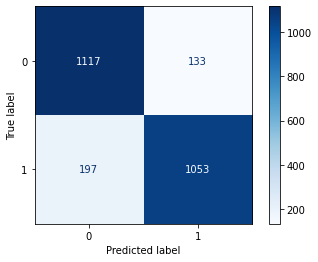

In [26]:
# View confusion matrix
plot_confusion_matrix(lr_model, X_test, y_test, cmap='Blues', values_format='d');

In [27]:
# Calculate the specificity  and Sensitivity 
spec = tn / (tn + fp)

print(f'Specificity: {round(spec,4)}')

sens = tp / (tp + fn)

print(f'Sensitivity: {round(sens,4)}')

Specificity: 0.8936
Sensitivity: 0.8424


## Naive Bayes and Count Vectorizer

In [28]:
pipe = Pipeline([
    ('vec', CountVectorizer()),
    ('mnb', MultinomialNB())
])

pipe_params = {'vec__max_features': [None, 3000, 5000, 10000],
               'vec__ngram_range' : [(1,1), (1,2)],
               'vec__stop_words'  : [None, 'english', stop_words]}

gs_vec_mnb = GridSearchCV(pipe,
                 param_grid = pipe_params,
                 cv = 5,
                 scoring = 'accuracy')

gs_vec_mnb.fit(X_train, y_train)

print(f'GridSearchCV score with MultinomialNB & CountVectorized features on training set is {round(gs_vec_mnb.score(X_train, y_train),4)}.')
print()
print(f'GridSearchCV score with MultinomialNB & CountVectorized features on testing set is {round(gs_vec_mnb.score(X_test, y_test),4)}.')

GridSearchCV score with MultinomialNB & CountVectorized features on training set is 0.9668.

GridSearchCV score with MultinomialNB & CountVectorized features on testing set is 0.8504.


In [29]:
gs_vec_mnb.best_params_

{'vec__max_features': None,
 'vec__ngram_range': (1, 2),
 'vec__stop_words': 'english'}

In [30]:
## Grab best estimator from GridSearch
mnb_model = gs_vec_mnb.best_estimator_

## Fit Model
mnb_model.fit(X_train, y_train)

print(f'Training accuracy score for our Multinomial Naive Bayes model is: {round(mnb_model.score(X_train, y_train),4)}.')
print(f'Testing accuracy score for our Multinomial Naive Bayes model is: {round(mnb_model.score(X_test, y_test),4)}.')

Training accuracy score for our Multinomial Naive Bayes model is: 0.9668.
Testing accuracy score for our Multinomial Naive Bayes model is: 0.8504.


In [31]:
# Get predictions
pred = mnb_model.predict(X_test)
# Save confusion matrix values

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

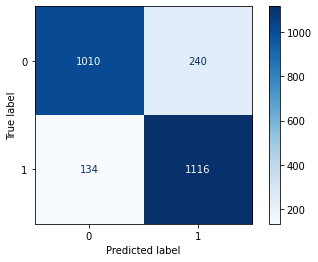

In [32]:
# View confusion matrix
plot_confusion_matrix(mnb_model, X_test, y_test, cmap='Blues', values_format='d');

In [33]:
# Calculate the specificity  and Sensitivity 
spec = tn / (tn + fp)

print(f'Specificity: {round(spec,4)}')

sens = tp / (tp + fn)

print(f'Sensitivity: {round(sens,4)}')

Specificity: 0.808
Sensitivity: 0.8928


## Random Forest and Count Vectorizer

In [34]:
rf = RandomForestClassifier()
cvect= CountVectorizer(ngram_range=(1,2))
X_train_cv = cvect.fit_transform(X_train)
X_test_cv = cvect.transform(X_test)

In [35]:
print(f'Mean score is {cross_val_score(rf,X_train_cv,y_train).mean()}')

Mean score is 0.8532


In [36]:
rf = RandomForestClassifier()
rf_params = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 1, 2, 3, 4, 5],
    'min_samples_split': [2,3,4],
    'max_features': ['auto', 10, 20, 50]      

#     'max_features': ['auto',1.0]      took too long to run
}
rf_gs = GridSearchCV(rf, param_grid=rf_params)
rf_gs.fit(X_train_cv, y_train)
print(rf_gs.best_score_)
print(rf_gs.best_params_)
print('')
print('train score:',rf_gs.score(X_train_cv, y_train))
print('test score:',rf_gs.score(X_test_cv, y_test))

0.8469333333333333
{'max_depth': None, 'min_samples_split': 3, 'n_estimators': 30}

train score: 0.9913333333333333
test score: 0.8416


In [37]:
## Grab best estimator from GridSearch
rf_model = rf_gs.best_estimator_

## Fit Model
rf_model.fit(X_train_cv, y_train)

print(f'Training accuracy score for our Random Forest model is: {round(rf_model.score(X_train_cv, y_train),4)}.')
print(f'Testing accuracy score for our Random Forest Bayes model is: {round(rf_model.score(X_test_cv, y_test),4)}.')

Training accuracy score for our Random Forest model is: 0.9913.
Testing accuracy score for our Random Forest Bayes model is: 0.8484.


In [38]:
# Get predictions
pred = rf_model.predict(X_test_cv)
# Save confusion matrix values

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

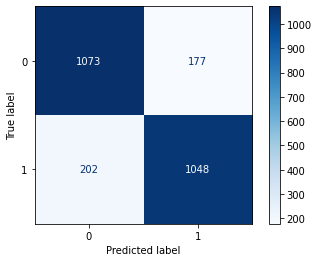

In [39]:
plot_confusion_matrix(rf_model, X_test_cv, y_test, cmap='Blues', values_format='d');

In [40]:
# Calculate the specificity  and Sensitivity 
spec = tn / (tn + fp)

print(f'Specificity: {round(spec,4)}')

sens = tp / (tp + fn)

print(f'Sensitivity: {round(sens,4)}')

Specificity: 0.8584
Sensitivity: 0.8384


## Evaluation

All three models performed significally higher that the baseline accuracy of 50%. Based on the test accuracy score, the naive bayes classification model performed the best out of the three. Even though it had a slightly lower score on both train and test data, it had the highest accuracy score and was the least overfit out of the three models. 

The next step to improve my model would include in covering more parameter options in GridSearchCV, expand my list of stop words, and look into mislcassifications. Futhermore, I believe a sentiment analysis would prove itself to be very useful and informative.

| Model    | train  score | test score | specificity | sensitivity |
|----------|--------------|------------|-------------|-------------|
| lr_model | 0.985        | 0.868      | 0.893       | 0.842       |
| mnb_model| 0.966        | 0.85       | 0.808       | 0.89        |
| rf_model | 0.991        | 0.848      | 0.858       | 0.838       |